In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from sklearn.metrics import mean_absolute_percentage_error

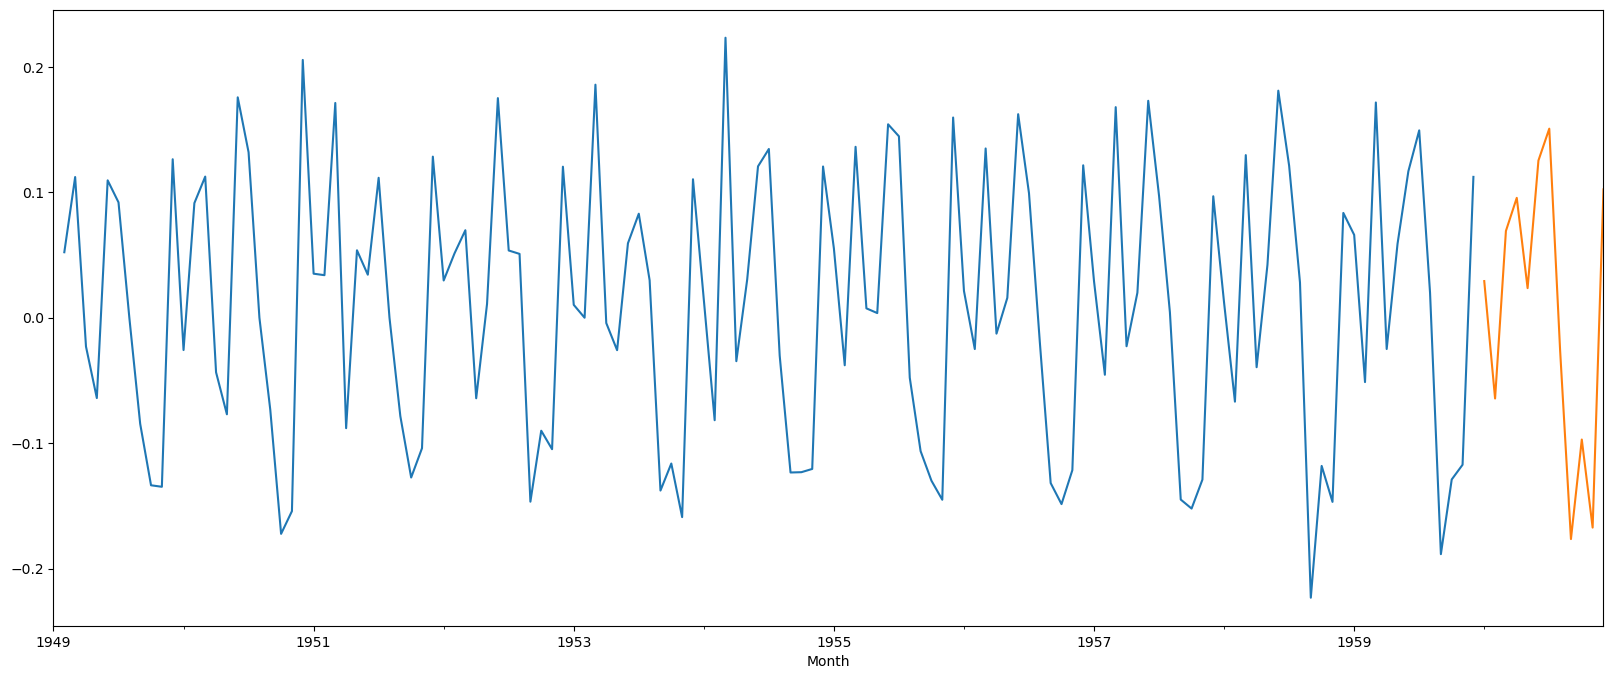

In [2]:
# Neural network forecasting with airline passenger time series
air_passengers = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
# Logarithmize and difference air_passenger series
air_passengers['LogPassengers'] = np.log(air_passengers['Passengers'])
air_passengers['DiffLogPassengers'] = air_passengers['LogPassengers'].diff()
# Create test and training data
train = air_passengers.iloc[:-12]
test = air_passengers.iloc[-12:]

train["DiffLogPassengers"].plot(figsize=(20, 8))
test["DiffLogPassengers"].plot(figsize=(20, 8));

In [3]:
# create two boolean series indicating rows that belong to test and training series respectively
train_id = air_passengers.index <= train.index[-1]
test_id = air_passengers.index > train.index[-1]

In [4]:
series = air_passengers['DiffLogPassengers'].dropna().to_numpy()

# Make dataset with p=12 input observations (x) for every output y
p = 12
X = []
Y = []
for t in range(len(series) - p):
    x = series[t:t+p]
    X.append(x)
    y = series[t+p]
    Y.append(y)

X = np.array(X).reshape(-1, p)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (131, 12) Y.shape (131,)


In [5]:
# make training and test data
Xtrain, Ytrain = X[:-12], Y[:-12]
Xtest, Ytest = X[-12:], Y[-12:]

# Neural Network with p=10 inputs that are fed into an activation function that produces a 32-dimensional output which
# is then aggregatedto get a 1-dimensional x
i = Input(shape=(p,))
x = Dense(32, activation='sigmoid')(i)
x = Dense(1)(x)
model = Model(i, x)


In [6]:
# Configure model and fit it to training set
model.compile(
  loss='mse',
  optimizer='adam',
)

r = model.fit(
  Xtrain,
  Ytrain,
  epochs=150,
  validation_data=(Xtest, Ytest)
)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0886 - val_loss: 0.0512
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0511 - val_loss: 0.0275
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0279 - val_loss: 0.0146
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0145 - val_loss: 0.0102
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0103 - val_loss: 0.0105
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0110 - val_loss: 0.0122
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0127 - val_loss: 0.0126
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0133 - val_loss: 0.0118
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0118 - val_loss: 0.0103
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0104 - val_loss: 0.0091
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0094 - val_loss: 0.0085
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0083 - val_loss: 0

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


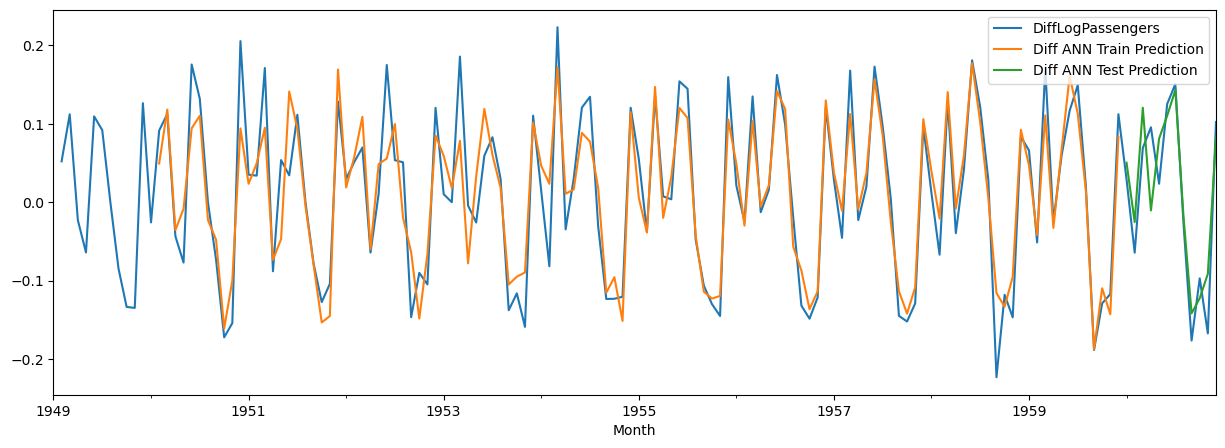

In [7]:
# first p+1 values are not predictable
train_id[:p+1] = False 
# make forecasts in training and test set
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

# Store diff predictions
air_passengers.loc[train_id, 'Diff ANN Train Prediction'] = Ptrain
air_passengers.loc[test_id, 'Diff ANN Test Prediction'] = Ptest

cols = ['DiffLogPassengers',
        'Diff ANN Train Prediction',
        'Diff ANN Test Prediction']
air_passengers[cols].plot(figsize=(15, 5));

